In [42]:
from IPython.display import Audio
import json
from datasets import load_dataset

In [192]:
# data
dataset = load_dataset("potsawee/speecheval-advanced-v1")['train']

Repo card metadata block was not found. Setting CardData to empty.


In [769]:
id = 81

In [770]:
dataset[id]['instruction']

'Narrate a brief story about shopping at a local market in Singapore, using Singlish terms and expressions to enhance authenticity.'

In [771]:
if ds[id]['position'] == "model_1":
    print("GPT-4o-audio  =", ds[id]['position'])
    print("ASR+Llama+TTS =", "model_2")
else:
    print("ASR+Llama+TTS =", "model_1")
    print("GPT-4o-audio  =", ds[id]['position'])

GPT-4o-audio  = model_1
ASR+Llama+TTS = model_2


In [772]:
with open(f"../eval-leaderboard/judge_outputs/advvoiceq1_v2/judge_gpt4o_prompt1.1_candidate_asrllamatts/{id}.txt") as f:
    judge = json.loads(f.read())["response"]
print(judge)

[Explanation]
In terms of content quality, Model_1 provides a brief and coherent story about shopping at a local market in Singapore, using Singlish terms effectively. The narrative is simple but captures the essence of a market visit. Model_2, on the other hand, offers a more detailed and structured story, incorporating various aspects of the market experience and using Singlish terms as well. Both models fulfill the user's request, but Model_2's response is more elaborate and engaging.

Regarding voice quality, Model_1's speech generation matches the requested tone and style, using Singlish expressions naturally and with appropriate intonation and rhythm. The speech sounds dynamic and expressive. Model_2, while also using Singlish terms, has a more formal tone and lacks the same level of expressiveness and natural flow as Model_1. It sounds more scripted and less authentic in its delivery.

[Rankings]
{
    "content":
    [
        {"model": "model_2", "rank": "1"},
        {"model":

In [773]:
# GPT-4o
with open(f"../eval-leaderboard/experiments/advvoiceq1/gpt4o/transcript/{id}.txt") as f:
    gpt4o = f.read()
print(gpt4o)
Audio(f"../eval-leaderboard/experiments/advvoiceq1/gpt4o/audio/{id}.wav")

Wah, today I go to the market lah, damn shiok lor! Got so many things to buy there. I go to the veg stall first, aunty there say must buy her fresh veg, very good price. Then I walk to the fishmonger, wah, the fish damn fresh leh, can even see the eyes so clear. I also buy some ayam from the chicken stall, uncle give me discount, say because I regular customer mah. I love going to the market, sure can find good things and chat with the uncles and aunties there.


In [774]:
# ASR+llama+TTS
with open(f"../eval-leaderboard/experiments/advvoiceq1/asr_google/transcript_llama/{id}.txt") as f:
    text = f.read()
print(text)
Audio(filename=f"../eval-leaderboard/experiments/advvoiceq1/asr_google/transcript_llama_kokoro/{id}.wav")

It was a hot and humid Saturday morning in Singapore, and I decided to head down to the local market at Tiong Bahru to do some shopping. As I walked in, I was greeted by the friendly stall owner, Ah Hock, who exclaimed, "Ah, you come to buy some kai siak kai (roast chicken) and char kway teow (stir-fried noodles) lah!"

I smiled and replied, "Yes, Ah Hock, I'm feeling quite peckish today. Give me a plate of your famous char kway teow, and a few pieces of roast chicken, please." Ah Hock chuckled and said, "You want to eat like a king, eh? Okay, I give you the best, but you must try my new dish, lor mee (braised noodles) with pork belly, it's very popular among the locals."

I agreed to try it, and Ah Hock handed me a steaming plate of lor mee, which was indeed very delicious. As I was eating, I noticed a stall selling fresh fruits, and I decided to buy some durians and rambutans to bring back home. The fruit vendor, Madam Tan, said, "Ah, you want to buy some durians, eh? Make sure you e

# Sanity Check -- judge score

In [273]:
import matplotlib.pyplot as plt

In [410]:
def read_judge_output_dir(judge_output_dir, N=-1, verbose=True):
    winner_content_ref, winner_content_can = 0, 0
    winner_voice_ref, winner_voice_can = 0, 0
    error = 0
    if N == -1:
        N = len(dataset)
    for i in range(N):
        x = dataset[i]
        conversation_id = x["id"]
        ref_model_type = x["position"]
        judge_output_path = f"{judge_output_dir}/{conversation_id}.txt"
        with open(judge_output_path) as f:
            y = json.load(f)
        response = y['response']
        # calculate winner ratio
        verdict = response.split("[Rankings]")[-1].strip("```").strip("json").strip("python").strip()
        parsed = json.loads(verdict)

        if int(parsed['content'][0]['rank']) == int(parsed['content'][1]['rank']):
            winner_content_ref += 0.5
            winner_content_can += 0.5
        else:
            yy = parsed['content'][0]
            if int(yy['rank']) == 1:
                if yy['model'] == 'model_1' and ref_model_type == 'model_1':
                    winner_content_ref += 1
                elif yy['model'] == 'model_1' and ref_model_type == 'model_2':
                    winner_content_can += 1
                elif yy['model'] == 'model_2' and ref_model_type == 'model_1':
                    winner_content_can += 1
                elif yy['model'] == 'model_2' and ref_model_type == 'model_2':
                    winner_content_ref += 1
                else:
                    raise Exception()
            elif int(yy['rank']) == 2:
                if yy['model'] == 'model_1' and ref_model_type == 'model_1':
                    winner_content_can += 1
                elif yy['model'] == 'model_1' and ref_model_type == 'model_2':
                    winner_content_ref += 1
                elif yy['model'] == 'model_2' and ref_model_type == 'model_1':
                    winner_content_ref += 1
                elif yy['model'] == 'model_2' and ref_model_type == 'model_2':
                    winner_content_can += 1
            else:
                error += 1
                continue

        if int(parsed['voice'][0]['rank']) == int(parsed['voice'][1]['rank']):
            winner_voice_ref += 0.5
            winner_voice_can += 0.5
        else:
            zz = parsed['voice'][0]
            if int(zz['rank']) == 1:
                if zz['model'] == 'model_1' and ref_model_type == 'model_1':
                    winner_voice_ref += 1
                elif zz['model'] == 'model_1' and ref_model_type == 'model_2':
                    winner_voice_can += 1
                    # print("ID:", i)
                elif zz['model'] == 'model_2' and ref_model_type == 'model_1':
                    winner_voice_can += 1
                    # print("ID:", i)
                elif zz['model'] == 'model_2' and ref_model_type == 'model_2':
                    winner_voice_ref += 1
                else:
                    raise Exception()
            elif int(zz['rank']) == 2:
                if zz['model'] == 'model_1' and ref_model_type == 'model_1':
                    winner_voice_can += 1
                    # print("ID:", i)
                elif zz['model'] == 'model_1' and ref_model_type == 'model_2':
                    winner_voice_ref += 1
                elif zz['model'] == 'model_2' and ref_model_type == 'model_1':
                    winner_voice_ref += 1
                elif zz['model'] == 'model_2' and ref_model_type == 'model_2':
                    winner_voice_can += 1
                    # print("ID:", i)
            else:
                error += 1
                continue
    winrate_content = winner_content_can / (winner_content_can + winner_content_ref) * 100
    winrate_voice = winner_voice_can / (winner_voice_can + winner_voice_ref) * 100
    if verbose:
        print("[Content] Candidate winner percentage: {:.2f}%".format(winrate_content))
        print("[Voice] Candidate winner percentage:   {:.2f}%".format(winrate_voice))
        print("error:", error)
    return winrate_content, winrate_voice

In [775]:
n = 81 + 1
_ = read_judge_output_dir("../eval-leaderboard/judge_outputs/advvoiceq1_v2/judge_gpt4o_prompt1.1_candidate_asrllamatts", N=n)

[Content] Candidate winner percentage: 51.22%
[Voice] Candidate winner percentage:   40.85%
error: 0


In [272]:
n_arr = [i for i in range(1, 83)]
wc_arr, wv_arr = [], []
for n in n_arr:
    wc, wv = read_judge_output_dir("../eval-leaderboard/judge_outputs/advvoiceq1_v2/judge_gpt4o_prompt1.1_candidate_asrllamatts", N=n, verbose=False)
    wc_arr.append(wc)
    wv_arr.append(wv)

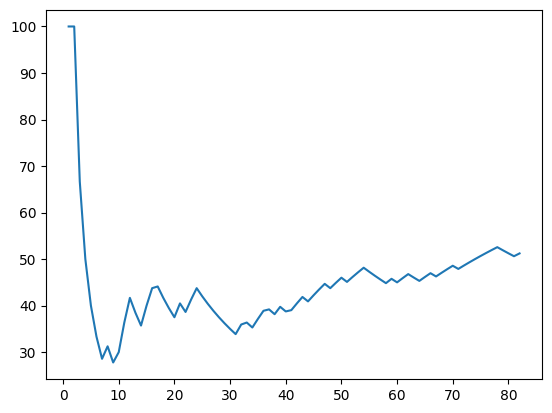

In [288]:
plt.plot(n_arr, wc_arr)

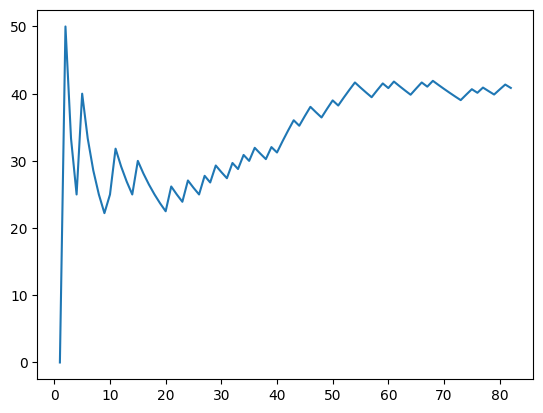

In [289]:
plt.plot(n_arr, wv_arr)